# Python for Spatial Analysis
## Second part of the module of GG3209 Spatial Analysis with GIS.
### Notebook to practice GeoPandas - Solution
---
Dr Fernando Benitez -  University of St Andrews - School of Geography and Sustainable Development - First Iteration 2023 v.1.0 

## 3.1 Practicing GeoPandas 

In the folder London Data you will find a shapefile representing the LSOA polygns with the population from the latest census 2021,  **data\london_data\Census2o_LSOA.shp** . For example, the column "Pop20" contains population counts for each LSOA area. For this excersice you need to create and wirte the code for the following challenges.

Read the **Census2o_LSOA.shp** layer into a GeoDataFrame.

- Subset the following columns (plus the geometry!):

    * LSOA11CD --> LSOA area code
    * LSOA11NM --> LSOA area name 
    * LSOA11NMW --> LSOA bigger area
    * Pop20 -->  Population counts

- What is the Coordinate Reference System of the layer? 

- How many features does the layer contain? Write an expression that returns the result as int.

- The values in the "LSOA11CD" column (code area ID) should all be unique. How can you make sure? Either use one of the methods we learned earlier, or search online (e.g., google “pandas check for duplicates”).

- Plot the layer using the .plot method

- Plot the layer using the .explorer method

- Subset just the LSOA areas with Pop20 counts greater than 1500.

- Plot the resulting subset, using symbology according to total population size, i.e., the "Pop_Total" column, and using a sequentual color map such as "Reds".

- How many areas are there with the requested population? (hint: shape)

- What is the total population of the subset layer? (hint: sum)

In [33]:
import geopandas as gpd
# currently you are getting a warning for a recelt update in geopandas, is it tottaly fine.

In [34]:
stat = gpd.read_file('data/london_data/Census2o_LSOA.shp')
stat.head()

LSOA11CD                   LSOA11NM                  LSOA11NMW   BNG_E  \
0  E01000001        City of London 001A        City of London 001A  532129   
1  E01000002        City of London 001B        City of London 001B  532480   
2  E01000003        City of London 001C        City of London 001C  532245   
3  E01000005        City of London 001E        City of London 001E  533581   
4  E01000006  Barking and Dagenham 016A  Barking and Dagenham 016A  544994   

    BNG_N      LONG       LAT     Shape__Are   Shape__Len  \
0  181625 -0.097060  51.51810  133324.978691  2291.187925   
1  181699 -0.091970  51.51868  226210.015953  2488.086900   
2  182036 -0.095230  51.52176   57285.328705  1142.242230   
3  181265 -0.076280  51.51452  190747.438499  2167.872156   
4  184276  0.089318  51.53876  144195.364548  1935.412725   

                               GlobalID  \
0  e87faa35-c559-4230-93be-8484ab490f70   
1  f0e3338a-e889-49be-8ca4-c7f2de90afd6   
2  a3512b47-41ae-4703-8264-c7cc44db1b37   
3  b62f5c70-737d-4936-9c85-eef139fce72f   
4  f74c0183-63f6-4468-b58d-577339257dea   

                                           MERGE_SRC   Shape_Leng  \
0  LSOA__Dec_2011__Boundaries_Generalised_Clipped...  2291.187925   
1  LSOA__Dec_2011__Boundaries_Generalised_Clipped...  2488.086900   
2  LSOA__Dec_2011__Boundaries_Generalised_Clipped...  1142.242230   
3  LSOA__Dec_2011__Boundaries_Generalised_Clipped...  2167.872156   
4  LSOA__Dec_2011__Boundaries_Generalised_Clipped...  1935.412725   

      Shape_Area  LSOA_Code                  LSOA_Name   Pop20  ObjectID  \
0  133324.978700  E01000001        City of London 001A  1749.0     28010   
1  226210.015930  E01000002        City of London 001B  1678.0     28011   
2   57285.328700  E01000003        City of London 001C  1900.0     28012   
3  190747.438514  E01000005        City of London 001E  2181.0     28013   
4  144195.364528  E01000006  Barking and Dagenham 016A  2117.0     28016   

                                            geometry  
0  POLYGON ((532105.092 182011.230, 532162.491 18...  
1  POLYGON ((532634.497 181926.016, 532619.141 18...  
2  POLYGON ((532135.138 182198.131, 532158.250 18...  
3  POLYGON ((533808.018 180767.774, 533649.037 18...  
4  POLYGON ((545122.049 184314.931, 545271.849 18...

In [35]:
stat = stat[["LSOA11CD", "LSOA11NM", "LSOA11NMW", "Pop20", "geometry"]]
stat.head()

LSOA11CD                   LSOA11NM                  LSOA11NMW   Pop20  \
0  E01000001        City of London 001A        City of London 001A  1749.0   
1  E01000002        City of London 001B        City of London 001B  1678.0   
2  E01000003        City of London 001C        City of London 001C  1900.0   
3  E01000005        City of London 001E        City of London 001E  2181.0   
4  E01000006  Barking and Dagenham 016A  Barking and Dagenham 016A  2117.0   

                                            geometry  
0  POLYGON ((532105.092 182011.230, 532162.491 18...  
1  POLYGON ((532634.497 181926.016, 532619.141 18...  
2  POLYGON ((532135.138 182198.131, 532158.250 18...  
3  POLYGON ((533808.018 180767.774, 533649.037 18...  
4  POLYGON ((545122.049 184314.931, 545271.849 18...

In [38]:
stat.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [37]:
stat.shape[0]

3920

In [39]:
stat["LSOA11CD"].duplicated().any()


False

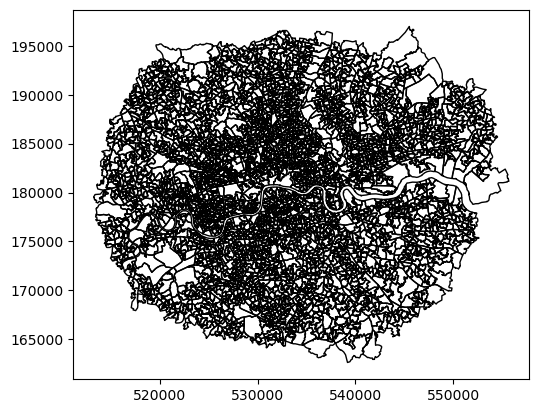

In [40]:
stat.plot(edgecolor="black", color="none");


In [41]:
stat.explore(column='Pop20', cmap='RdYlBu')

In [42]:
sel = stat["Pop20"] <= 1500
stat1 = stat[sel]
stat1

LSOA11CD                   LSOA11NM                  LSOA11NMW   Pop20  \
20    E01000022  Barking and Dagenham 008B  Barking and Dagenham 008B  1443.0   
33    E01000036  Barking and Dagenham 010B  Barking and Dagenham 010B  1473.0   
35    E01000038  Barking and Dagenham 003C  Barking and Dagenham 003C  1422.0   
44    E01000048  Barking and Dagenham 021B  Barking and Dagenham 021B   878.0   
47    E01000051  Barking and Dagenham 021D  Barking and Dagenham 021D  1021.0   
...         ...                        ...                        ...     ...   
3884  E01033699               Hackney 021G               Hackney 021G  1482.0   
3892  E01033707               Hackney 021I               Hackney 021I  1365.0   
3905  E01033732             Greenwich 036D             Greenwich 036D  1138.0   
3908  E01033735             Greenwich 004G             Greenwich 004G  1286.0   
3919  E01033746             Greenwich 038E             Greenwich 038E  1389.0   

                                               geometry  
20    POLYGON ((547136.925 186216.040, 547140.177 18...  
33    POLYGON ((549719.797 185534.661, 549924.367 18...  
35    POLYGON ((550739.318 187373.774, 550978.754 18...  
44    POLYGON ((544633.054 183501.943, 544642.179 18...  
47    POLYGON ((544538.706 183924.511, 544620.929 18...  
...                                                 ...  
3884  POLYGON ((533757.199 185287.343, 533799.766 18...  
3892  POLYGON ((533824.001 184162.000, 533816.076 18...  
3905  POLYGON ((539800.063 179064.766, 539907.000 17...  
3908  POLYGON ((543485.770 179083.438, 543556.813 17...  
3919  POLYGON ((538140.000 177313.000, 538129.177 17...  

[559 rows x 5 columns]

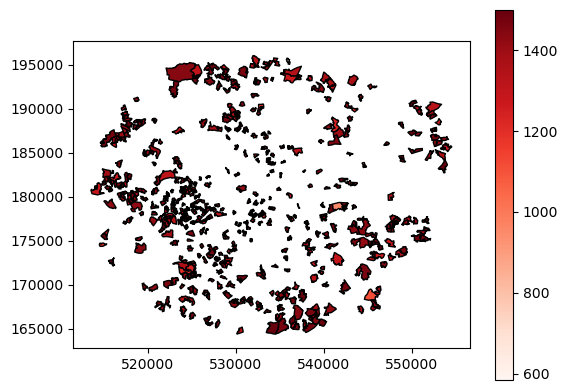

In [43]:
stat1.plot(column="Pop20", edgecolor="black", cmap="Reds", legend=True);

In [46]:
stat1.shape[0]

559

In [45]:
stat1["Pop20"].sum()

769894.0

## 3.2 Practicing Rasterio

Import rasterio under the alias `rio`.

In [1]:
import matplotlib.pyplot as plt
import rasterio as rio
import earthpy as et
import earthpy.plot as ep

c:\Users\benit\miniconda3\envs\py4sa\lib\site-packages\earthpy\spatial.py:15: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


Download the following raster image, and then write the required code to accomplish the following challenges.

https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/046/027/LC08_L1TP_046027_20181224_20190129_01_T1/LC08_L1TP_046027_20181224_20190129_01_T1_B8.TIF

- Read the file as a rasterio dataset
- What is the CRS of the dataset?
- What is the raster extent (bounds) of the dataset in projected coordinates?
- How many bands are there in this dataset?
- Create a plot of the image
- Create a Histograms from the raster
- Using EarthPy create a plot of false color

GH has a restriction in file size so you need to avoid to upload any file bigger than 50Mb,to do that you can add a new file in your repo that tells GitHub to ignore any file described in that file. For example if you dont need any files in a folder data/img, just add that path in the .gitignore file and the commit will ignore those.  If you take a quick look at our central repo you will see that this file .gitignore is already created and include a few paths that restrict the files I dont want to be part of my public repo including those big files.

Now, in case you have commited a big file you can also rever the commit or remove that file by

1. so you need to remove it with the following commands:

```git rm --cached path/to/giant_file```

2. Commit this change with --amend.

```git commit --amend -CHEAD```

3. And finally, you can push as usual!

```git push```




In [21]:
# The data is included in my computer in the folder data/img/rasterio, but that folder was included in the .gitignore file so it was not commited and pushed in the central repo.
elev_file = rio.open("data/img/rasterio/LC08_L1TP_046027_20181224_20190129_01_T1_B8.TIF")
elev_arr = elev_file.read(1)
elev_arr


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [22]:
print(elev_file.count)
print(elev_file.bounds)
print(elev_file.crs)


1
BoundingBox(left=472792.5, bottom=5136892.5, right=705907.5, top=5373307.5)
EPSG:32610


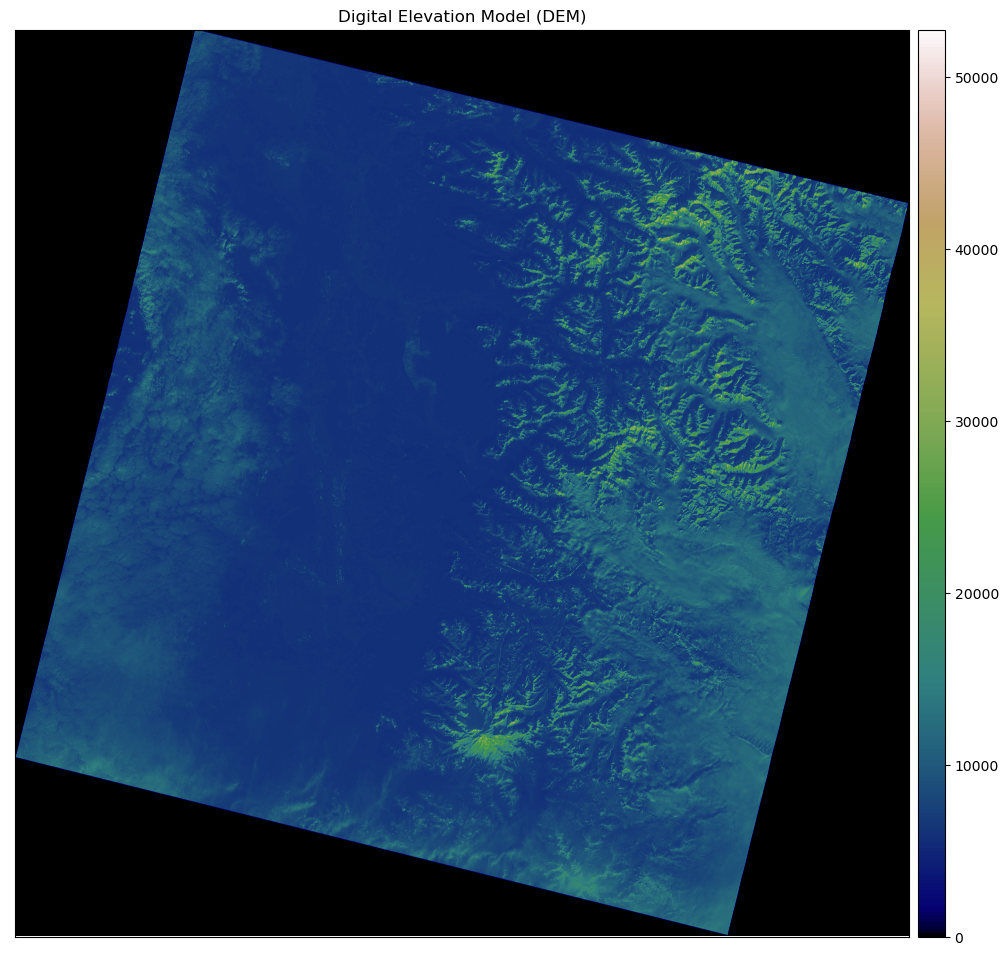

In [13]:
# Plot your data using earthpy

ep.plot_bands(elev_arr,
              title="Digital Elevation Model (DEM)",
              cmap="gist_earth")

plt.show()

In [14]:
print("the minimum raster value is: ", elev_arr.min())
print("the maximum raster value is: ", elev_arr.max())

the minimum raster value is:  0
the maximum raster value is:  52765


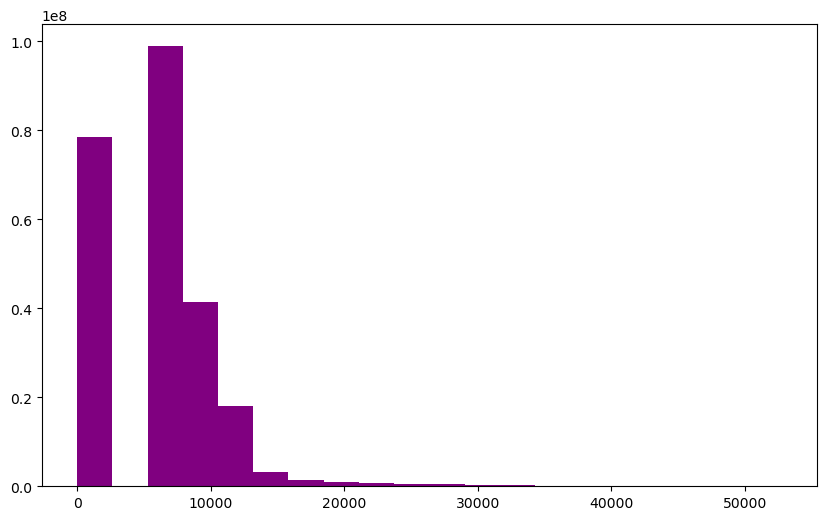

In [19]:
ep.hist(elev_arr,
        figsize=(10, 6))
plt.show()

Transformining the Zero Values to NaN data.

In [23]:
import numpy as np
elev_arr = elev_arr.astype('float')
elev_arr[elev_arr==0] = np.nan
elev_arr

In [26]:
elev_arr

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [30]:
print("the minimum raster value is: ", elev_arr.min())
print("the maximum raster value is: ", elev_arr.max())

the minimum raster value is:  nan
the maximum raster value is:  nan


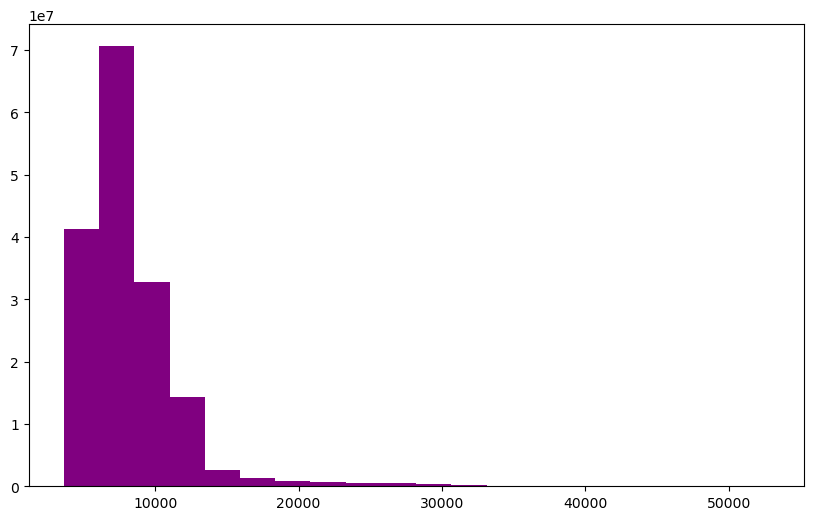

In [31]:
ep.hist(elev_arr,
        figsize=(10, 6))
plt.show()

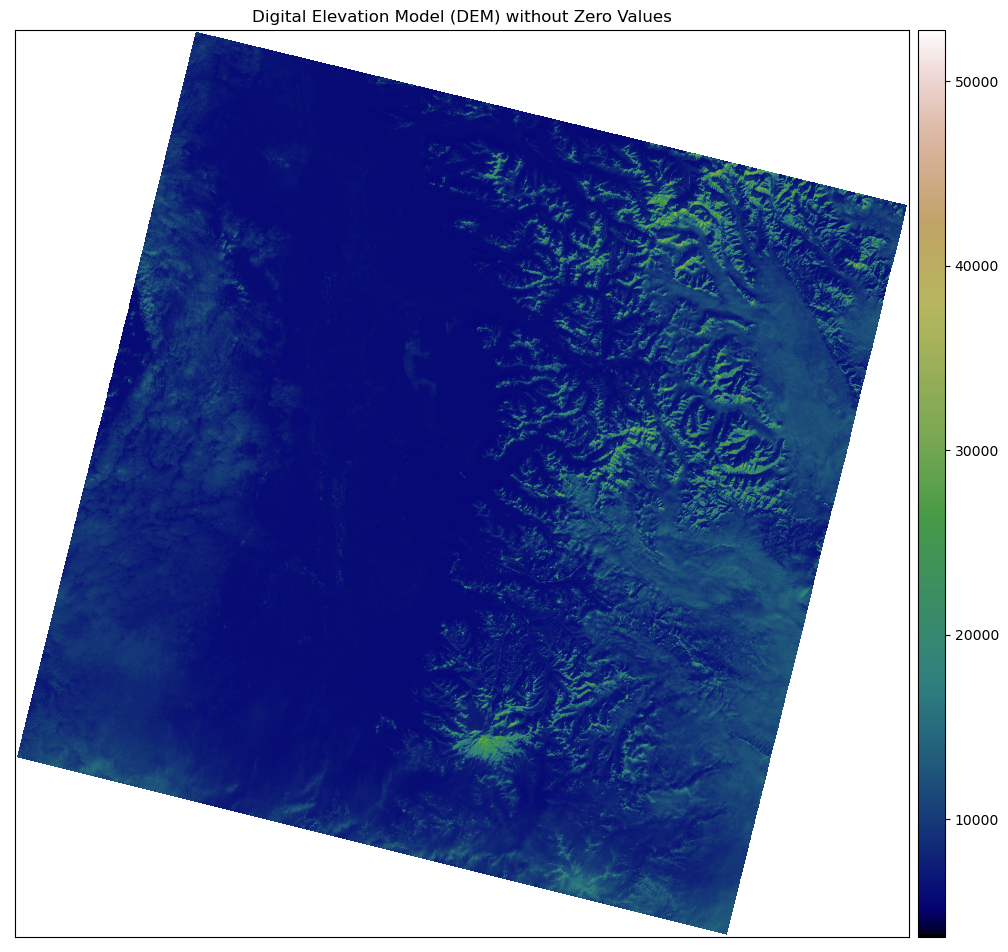

In [32]:
ep.plot_bands(elev_arr,
              title="Digital Elevation Model (DEM) without Zero Values",
              cmap="gist_earth")

plt.show()

As the provided raster does not included multiple bands you can't plot a false color image, as you need a 3 dimensions array

In [11]:
ep.plot_rgb(elev_arr,
            rgb=[4, 3, 2],
            stretch=True,
            str_clip=10)
plt.show()

ValueError: Input needs to be 3 dimensions and in rasterio order with bands first